# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [261]:
import pandas as pd 

from palmerpenguins import load_penguins
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

penguin = load_penguins()


enc = OneHotEncoder()

enc.fit(penguin[["species"]])

enc.transform(penguin[["species"]]).toarray()



array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

0.050370873007582584
0.01666990527906298
3.595824100199106
3.957555290953209
0.050370873007582584
0.01666990527906298
3.595824100199106
3.957555290953209


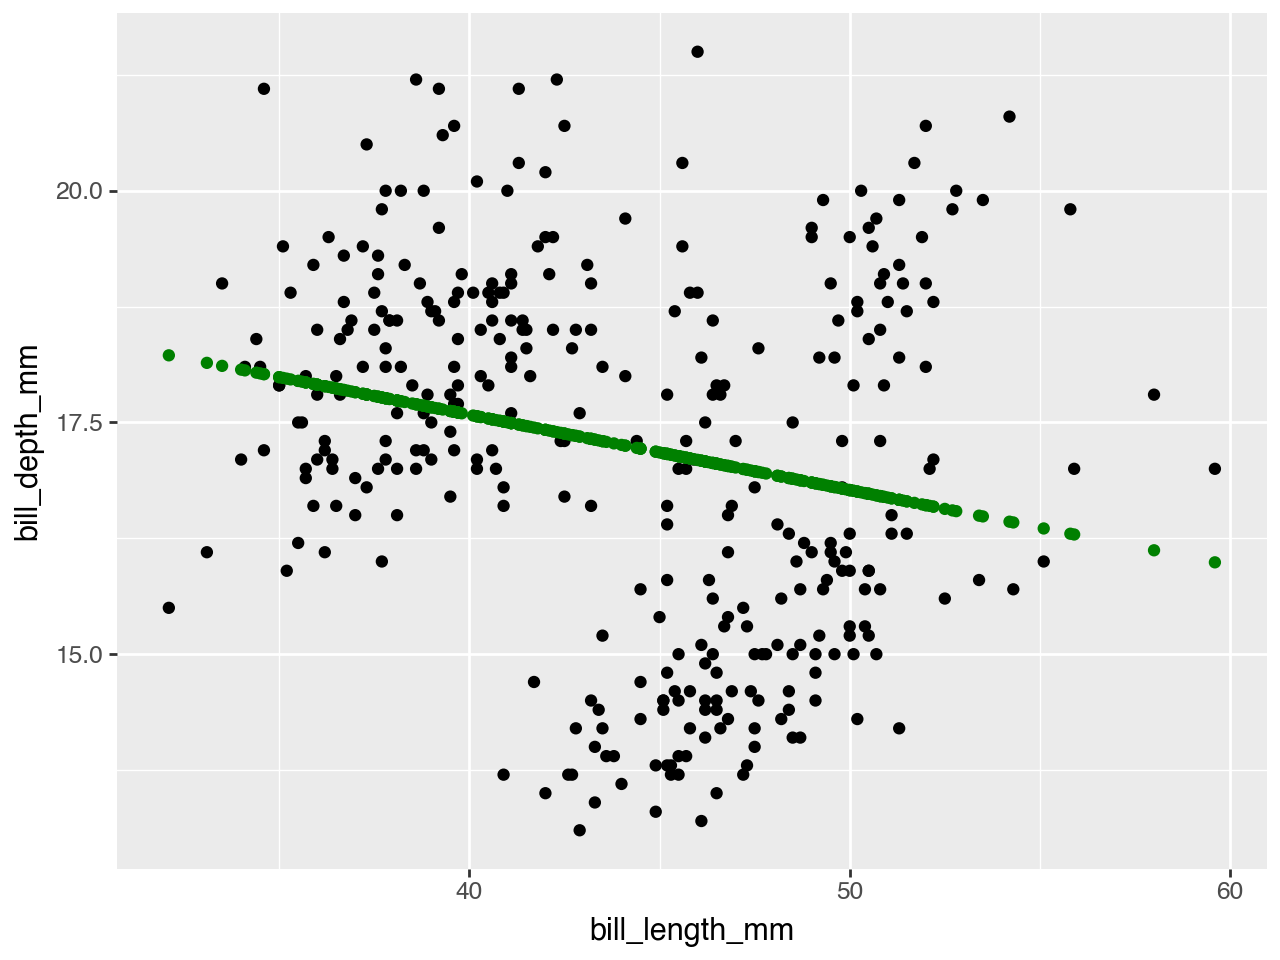

In [276]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from plotnine import *

penguin = penguin.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

x=penguin[['bill_length_mm']]
y=penguin[['bill_depth_mm']]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)


y_pred_lrTest = lr_fit.predict(X_train)


print(r2_score(y_train, y_pred_lrTest))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTest))
print(mean_squared_error(y_test,y_pred_lr))



pred = lr_fit.predict(x).ravel()  # Flatten to 1D array

(
    ggplot(penguin, aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_point()
    + geom_point(aes(y=pred), color="green")
)



In [255]:
x2=penguin[['bill_length_mm']]
y=penguin[['bill_depth_mm']]

x2["billSQ"]=x2["bill_length_mm"]**2

X_train, X_test, y_train, y_test = train_test_split(x2,y, test_size=0.25)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain = lr_fit.predict(X_train)


print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))




ggplot(penguin, aes(x="bill_length_mm", y = "bill_depth_mm"))
+ geom_point()

+ geom_point(aes(y=y_pred_lr), color = "green")


0.13965861413098613
-0.010753688516277782
3.451557811062952
3.536725006259204
0.13965861413098613
-0.010753688516277782
3.451557811062952
3.536725006259204


<positron-console-cell-255>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TypeError: bad operand type for unary +: 'geom_point'

<positron-console-cell-279>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-279>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.15129210792562797
0.026546567794984766
3.3163178001176004
3.5619827227892786
0.15129210792562797
0.026546567794984766
3.3163178001176004
3.5619827227892786


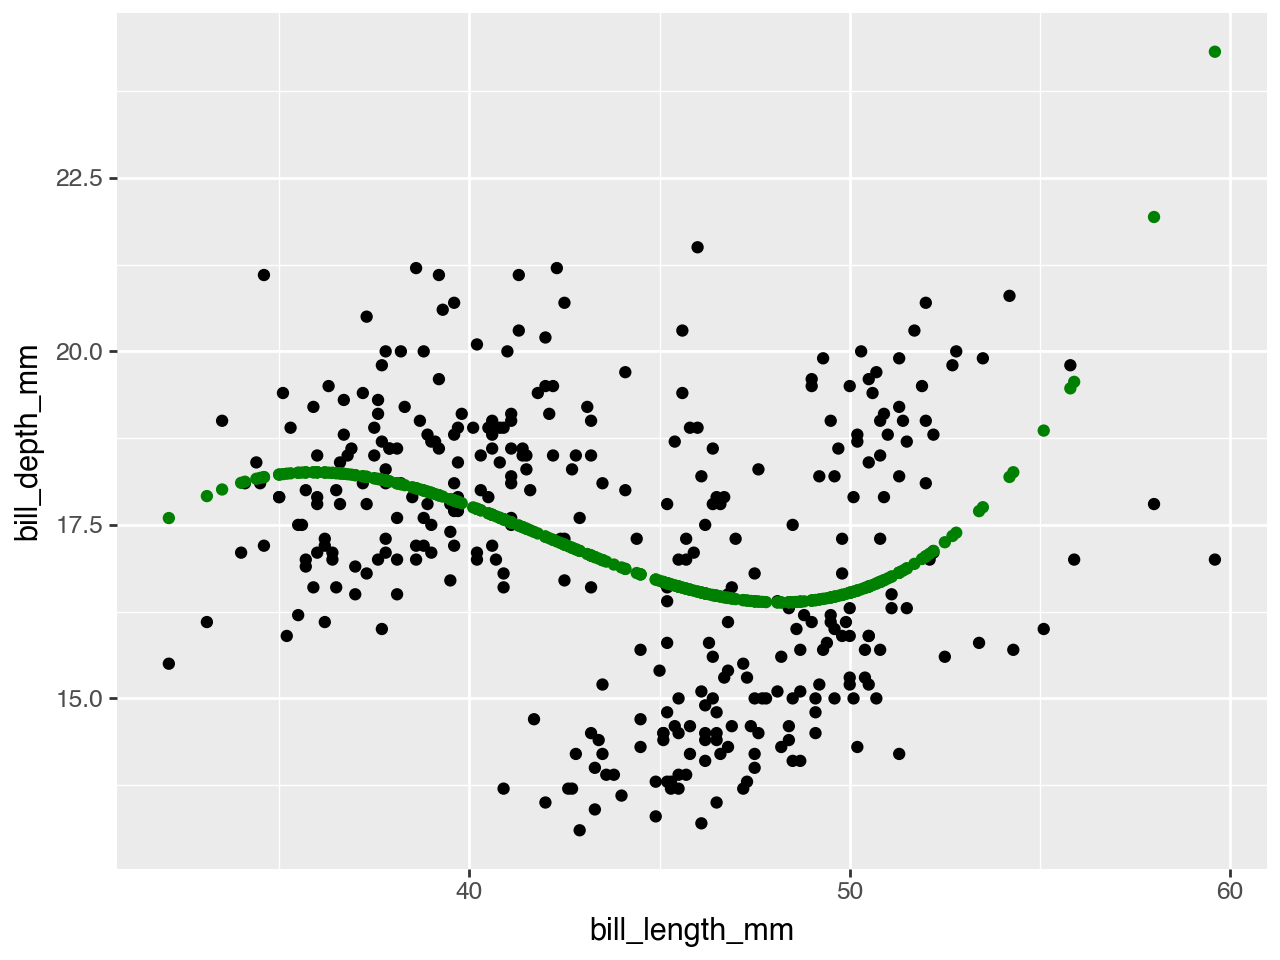

In [279]:
x3=penguin[['bill_length_mm']]
y=penguin[['bill_depth_mm']]


x3["billSQ"]=x["bill_length_mm"]**2
x3["billCB"]=x["bill_length_mm"]**3

X_train, X_test, y_train, y_test = train_test_split(x3,y, test_size=0.25)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain = lr_fit.predict(X_train)


print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))

print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))



pred = lr_fit.predict(x3).ravel()  # Flatten to 1D array

(
    ggplot(penguin, aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_point()
    + geom_point(aes(y=pred), color="green")
)


0.268151533747779
0.3464633789500222
2.8364531837305598
2.5488564438319536
0.268151533747779
0.3464633789500222
2.8364531837305598
2.5488564438319536


<positron-console-cell-278>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-278>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-278>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-278>:7: SettingWithC

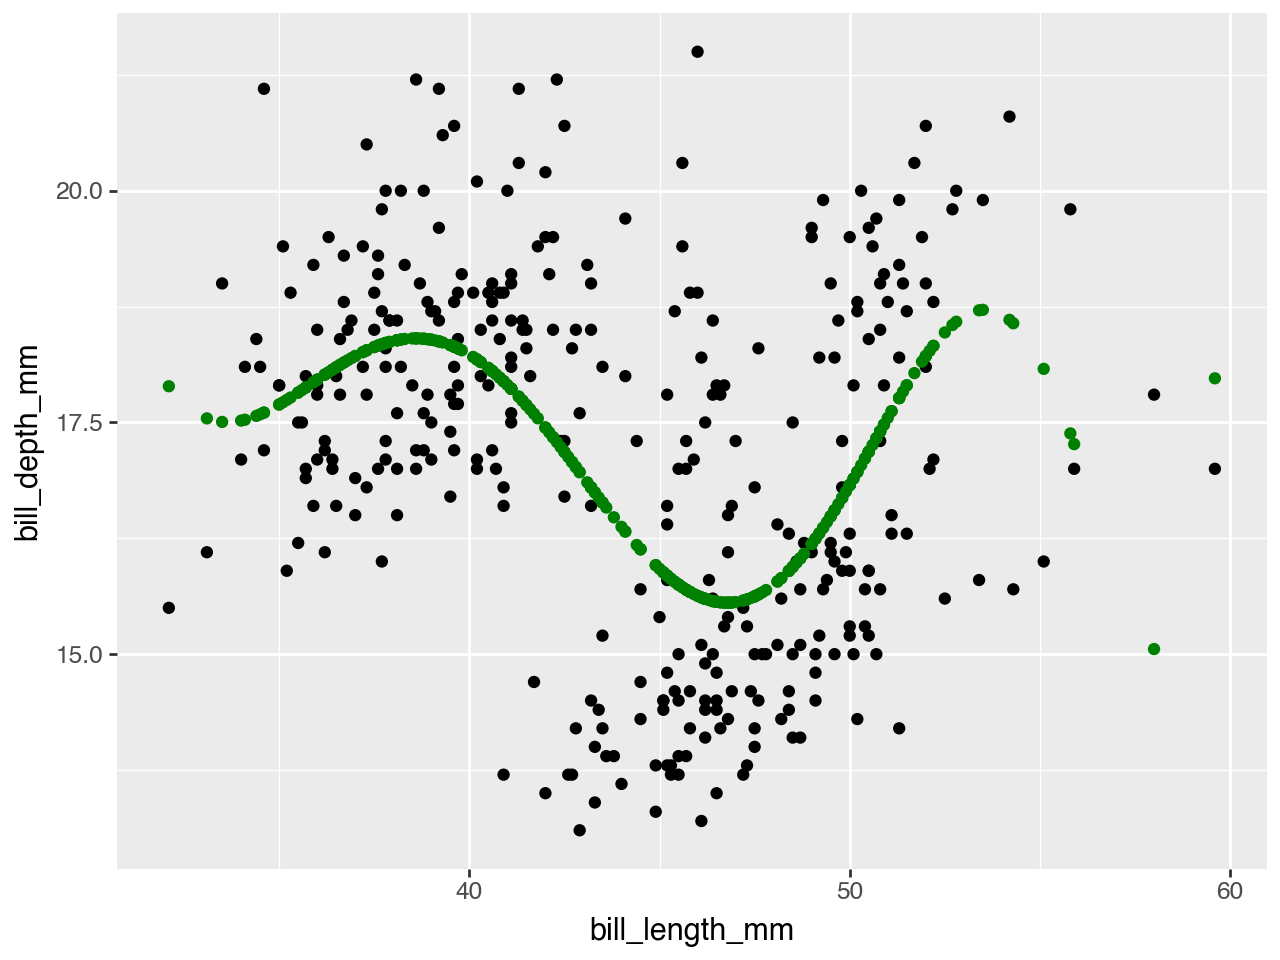

In [278]:
x10=penguin[['bill_length_mm']]
y=penguin[['bill_depth_mm']]

x10["billSQ"]=x10["bill_length_mm"]**2
x10["billCB"]=x10["bill_length_mm"]**3
x10["bill4"]=x10["bill_length_mm"]**4
x10["bill5"]=x10["bill_length_mm"]**5
x10["bill6"]=x10["bill_length_mm"]**6
x10["bill7"]=x10["bill_length_mm"]**7
x10["bill8"]=x10["bill_length_mm"]**8
x10["bill9"]=x10["bill_length_mm"]**9
x10["bill10"]=x10["bill_length_mm"]**10
X_train, X_test, y_train, y_test = train_test_split(x10,y, test_size=0.25)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)

y_pred_lrTrain= lr_fit.predict(X_train)


print(r2_score(y_train, y_pred_lrTrain))
print(r2_score(y_test, y_pred_lr))



print(mean_squared_error(y_train, y_pred_lrTrain))
print(mean_squared_error(y_test,y_pred_lr))


pred = lr_fit.predict(x10).ravel()  # Flatten to 1D array

(
    ggplot(penguin, aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_point()
    + geom_point(aes(y=pred), color="green")
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The 10th degree model is the best fit while the rest of the models appear to underfit the data. 